### 정규분포 ( Gaissian normal distribution )

 pdf ))
 
 $N(x;\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$
 
 
#### 분산의 역수 

 - 정밀도 ($\beta = \frac{1}{\sigma^2}$)

In [20]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

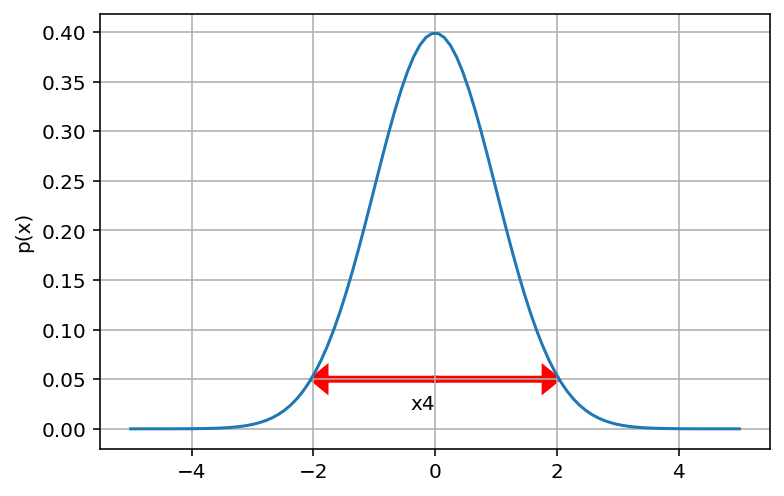

In [29]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw=3, color='r', head_width=0.02,
          head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r', head_width=0.02,
          head_length=0.2, length_includes_head=True)

plt.text(-0.4,0.02, "x4")
plt.ylabel('p(x)')
plt.grid()
plt.show()

In [30]:
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

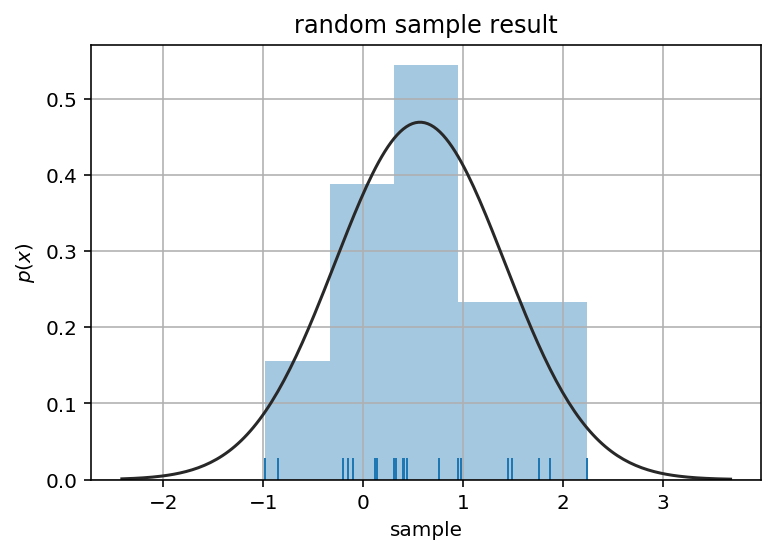

In [32]:
sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title('random sample result')
plt.xlabel("sample")
plt.ylabel("$p(x)$")
plt.grid()
plt.show()

#### 로그정규분포 

 - 데이터에 로그를 한 값 또는 변화율이 정규분포가 되는 분포
 - 데이터는 항상 양수

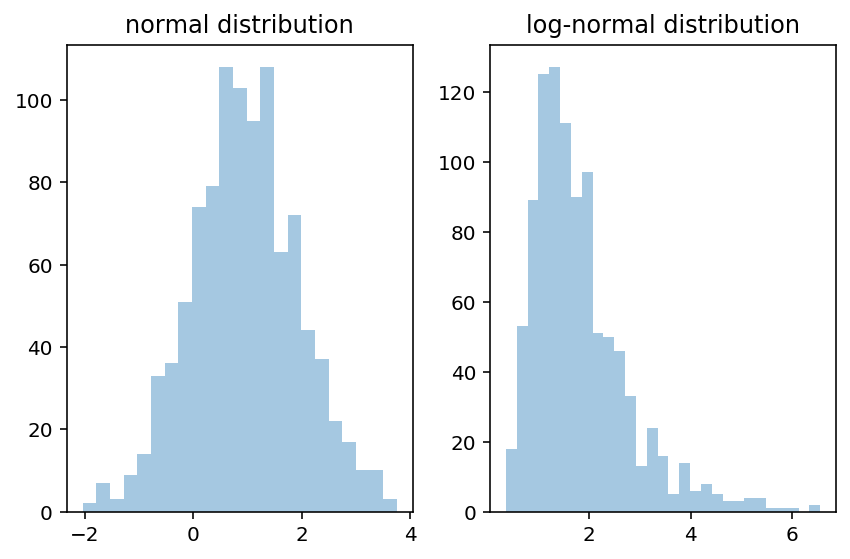

In [34]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc = mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1,2)
sns.distplot(x1, kde=False, ax = ax[0])
ax[0].set_title('normal distribution')
sns.distplot(x2, kde = False, ax = ax[1])
ax[1].set_title('log-normal distribution')
plt.tight_layout()
plt.show()

### Q-Q plot

 - scatter plot과 유사
 
 - sorting 
 - 몇 번째 데이터인 가능성이 가장 높은 값 (위치값)
 - 정규분포에서 위의 위치값이 나올 확률이 얼마인지 뽑아낸다 . == 분위수


In [35]:
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [36]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [40]:
qf = rv.ppf(position)
qf

array([-0.8241636 , -0.38768012, -0.11829229,  0.08777425,  0.26091865,
        0.4142824 ,  0.55493533,  0.68726332,  0.81431072,  0.93841854,
        1.06158146,  1.18568928,  1.31273668,  1.44506467,  1.5857176 ,
        1.73908135,  1.91222575,  2.11829229,  2.38768012,  2.8241636 ])

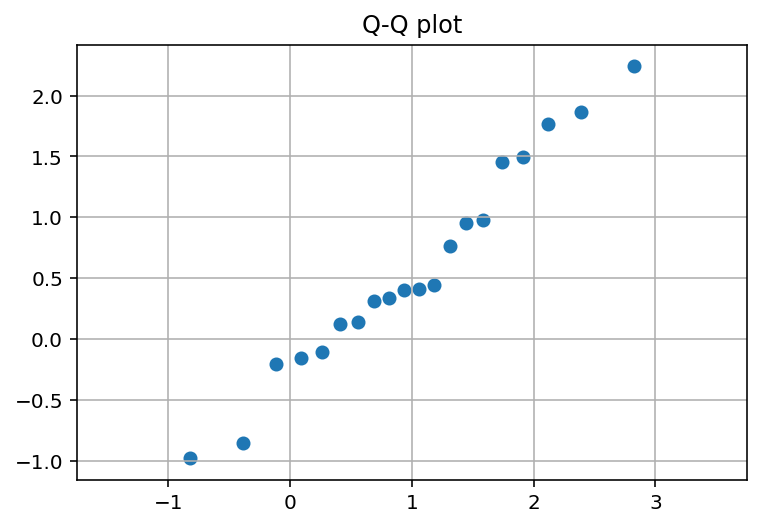

In [42]:
plt.scatter(qf, x_sorted)
plt.title("Q-Q plot")
plt.axis("equal")
plt.grid()
plt.show()

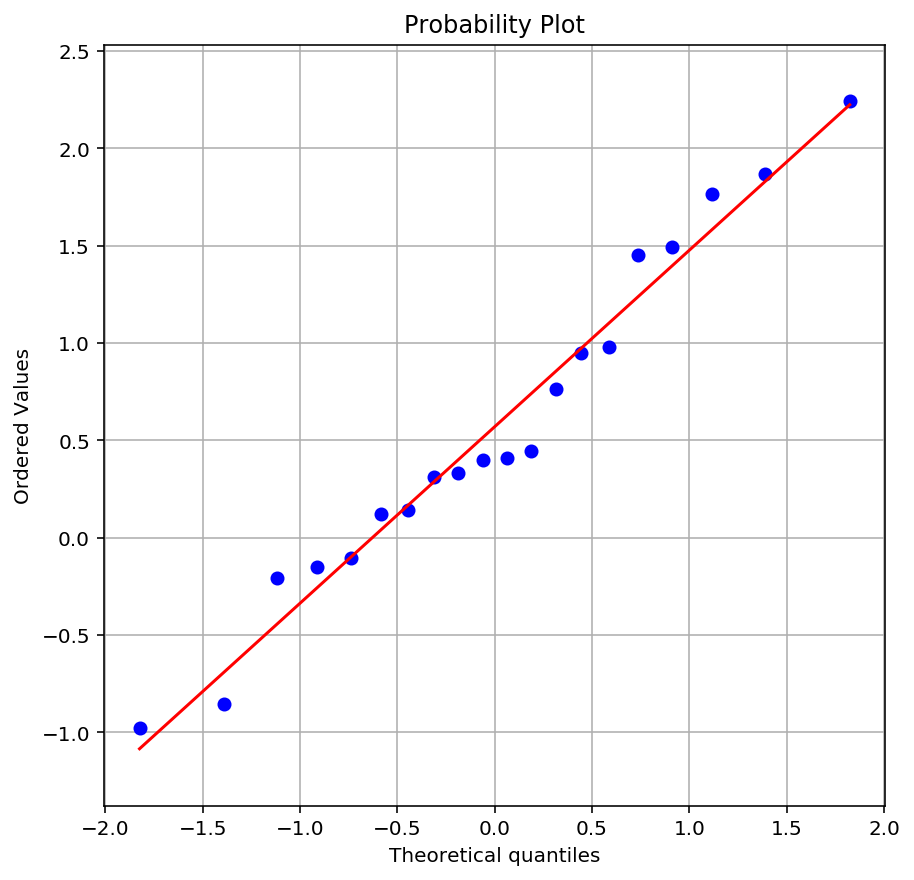

In [44]:
np.random.seed(0)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.grid()
plt.show()

### 중심극한정리 (central limit theorem)

 - 여러 변수의 합이 정규분포와 비슷한 분포를 이루는 현상

       - 표본평균
      $\bar x_N = \frac{1}{N}(x1+\cdots+x_N)$
      
   1) N개의 임의의 분포로 부터 얻은 표본의 평균은 N이 증가할수록 기대값이 $\mu$, 분산이 $\frac{\sigma^2}{N}$ 인 정규분포로 수렴
   
      $\bar X_N {\underrightarrow {d}}N(x;\mu,\frac{\sigma^2}{N})$
      
   2) N개의 임의의 분포로 부터 얻은 표본의 평균을 정규화하면 N이 증가할수록 표준정규분포로 수렴
   
      $\frac{\bar X_N - \mu}{\frac{\sigma}{\sqrt{N}}}\underrightarrow{d} N(x;0,1)$
      
      
---

### 정규분포 통계량 

 - N개의 정규분포에서 얻는 표본의 합은 N의 개수와 상관없이 정류분포를 이룬다. 
 
     $\sum^N_{i=1} ~ N(x_\mu,N_{\sigma^2})$
     
     - 기대값 0 , 표준편차 1
     
     $z = \frac{\bar x - \mu}{\frac{\sigma}{\sqrt N}} ~ N(x;0,1)$
     
---

### 선형회귀모형과 정규분포

 - 실제 y 값은 w와 x의 값을 N까지 선형조합한 후 정규분포 확률변수($\epsilon$)가 더해진 값
     $\rightarrow $정규분포를 따른다.
     
 - 구할수 없는 값을 다 넣어서  $\epsilon$ 이라고 하겠다.
      $\epsilon$이 기대값 0 인 정규분포라고 가정하는 것이 합리적
      
      $\epsilon ~ N(0,\sigma^2)$
      
      
----

### student - t 

 - 팻 테일을 보이는 데이터 모형에 적합
 
     $t(X;\mu,\lambda,\nu) = \frac{\sqrt{\lambda}}{\sqrt{\nu\pi}}\frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})}(1+ \lambda\frac{(x-\mu^2)}{\nu})^{-\frac{\nu+1}{2}}$


  - 정수값을 가지는 자유도라는 모수 $\nu$를 가진다.
    student-t 분포는 $\nu$가 2 이상인 자연수를 사용하는데, 만약 모수 $\nu$가 1인 경우는 코시분포, 그 중에서 양수만 사용하는 경우는 하프코시분포라고 한다. 
 
 
#### 기대값, 분산

 - 1차 모멘트 (기대값) 
     
     $E[X] = \mu$
     
 - 2차 모멘트 (분산)
 
     $Var[X] = \frac{\nu}{\lambda(\nu-2)}$
     
     * 분산의 대한 식은 $\nu > 2$ 일 경우에만 적용. $\nu = 1,2 $ 일 때는 분산이 무한대가 됨

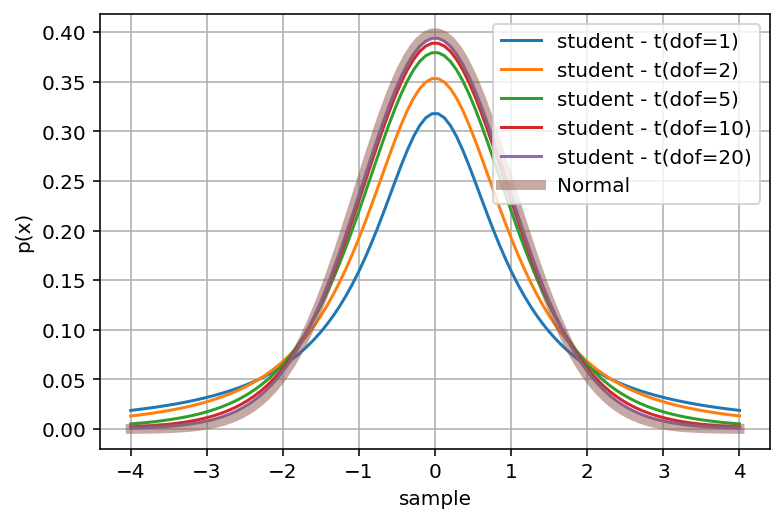

In [70]:
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("student - t(dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.xlabel("sample")
plt.ylabel("p(x)")
plt.legend()
plt.grid()
plt.show()

#### 카이제곱분포

 - 중심극한정리 : 여러분포에서 나온 값들을 더해주면 정규분포를 수렴한다

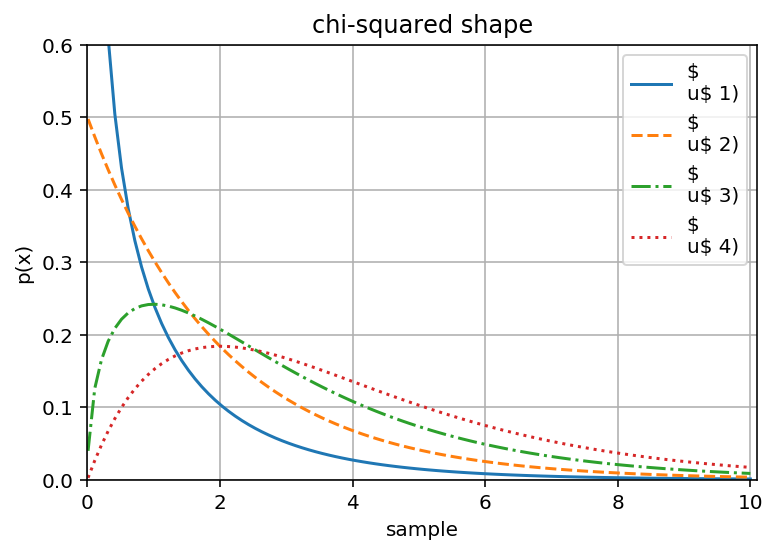

In [69]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("$\nu$ %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("chi-squared shape")
plt.xlabel("sample")
plt.ylabel("p(x)")
plt.legend()
plt.grid()
plt.show()

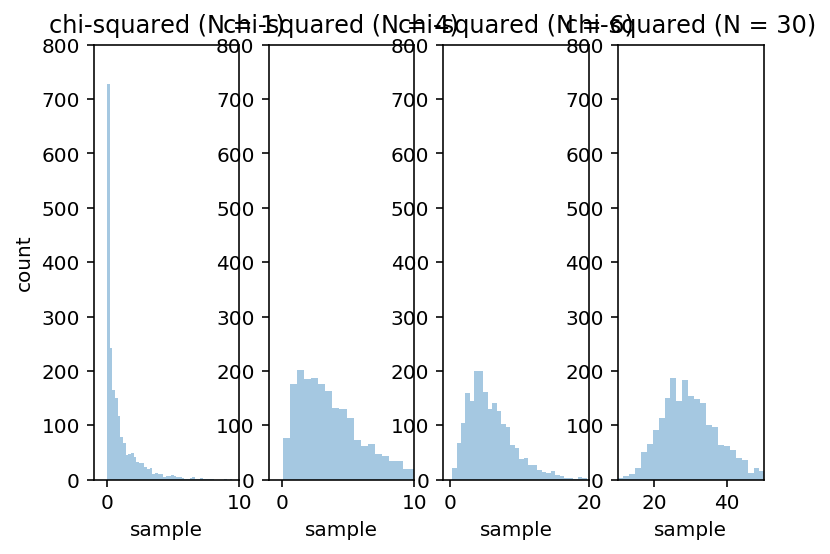

In [63]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 4, 1)
N = 1
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("chi-squared (N = 1)")
plt.xlabel("sample")
plt.ylabel("count")

plt.subplot(1, 4, 2)
N = 4
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("chi-squared (N = 4)")
plt.xlabel("sample")

plt.subplot(1, 4, 3)
N = 6
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 20)
plt.ylim(0, 800)
plt.title("chi-squared (N = 6)")
plt.xlabel("sample")

plt.subplot(1, 4, 4)
N = 30
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(10,50)
plt.ylim(0, 800)
plt.title("chi-squared (N = 30)")
plt.xlabel("sample")

plt.show()

#### F분포

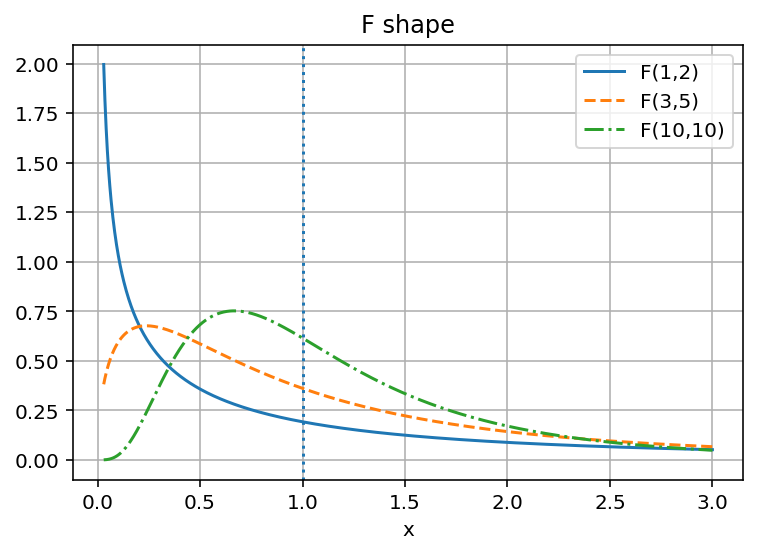

In [68]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("F shape")
plt.legend()
plt.grid()
plt.show()

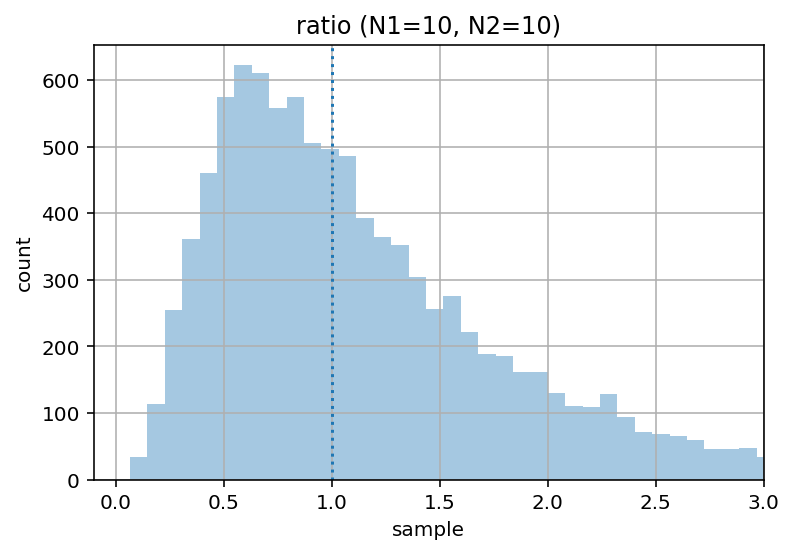

In [67]:
np.random.seed(0)

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)

t = t2 / t1
sns.distplot(t, bins=200, kde=False)
plt.axvline(1, ls=":");
plt.xlim(-0.1, 3)
plt.title("ratio (N1=10, N2=10)")
plt.xlabel("sample")
plt.ylabel("count")
plt.grid()
plt.show()


#### 정리

 - 정규분포 $\sum x_i$
 
  
 - Z 통계량 $\frac{\bar x -\mu}{\frac{\sigma}{\sqrt{N}}}$
 
 
 - student-t 분포 $\frac{\bar x -\mu}{\frac{s}{\sqrt{N}}}$
 
 
 - chi-squared 분포 $\sum^N_{i=1}x_i^2$
 
 
 - F분포 $\frac{\sum^{N_1}_{i=1}x_i^2}{\sum^{N_2}_{i=1}x_i^2}$
 
 
